In [112]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [113]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
from datetime import date
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

In [114]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [115]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1175792,076031747X,Soul on Bikes,NaN,A3RKBLMJITN6M9,Koy,0/0,5.0,1357430400,Very gripping!,Most of the african american based clubs usual...
1647998,B0007E20NO,At the feet of the master,NaN,A3JWEFUUFOE5AX,"Brian Moran ""inquisitive""",5/8,1.0,1262390400,False,"I have read alot of Krishnamurti,Probably the ..."
258986,1568361998,"The Home Team: Of Mothers, Daughters, and Amer...",NaN,NaN,NaN,0/0,5.0,887932800,THIS IS THE BEST BOOK I'VE EVER READ!!!!,This book is a touching true story about baske...
528593,1893554449,Uncivil Wars: The Controversy Over Reparations...,17.69,NaN,NaN,23/26,4.0,1011052800,Horowitz is unafriad in a politically correct ...,David Horowitz is one of the FEW brave America...
1121192,0963942972,Maui Revealed: The Ultimate Guidebook (2000 Ed...,NaN,A1U1PR7SAMT8R9,"Mr ""Man""",0/1,5.0,1005436800,"An excellent , well written book.",This is a very well written and referenced boo...
2458132,0028612574,The Naturally Sweet Baker : 150 Decadent Desse...,29.16,A2C9B0JCKGD021,"""jjtechs""",13/13,5.0,978998400,Easy to Enjoy,Most of the cookbooks I own come with the appl...
1654434,B000B5RY58,Dangerous Girls: The Rich Girl/The Dare/The Pr...,NaN,A2GFA1OJ7GBWIG,Norma Glock,0/1,2.0,1064707200,"Enticing cover, undeveloped story",I would not recommend this vampire book by Rob...
669221,B00072PESE,The monster at the end of this book (A little ...,NaN,A32R7GNGYMKOHG,"L. Svara ""mom of 3 in NY""",0/0,5.0,1165190400,My daughter LOVES this book!,The story is engaging and my daughter really e...
387302,1844014606,Friends and Enemies,20.95,AJGL46CJRHGRG,dj,2/3,5.0,1132963200,Excellent book,"Excellent book: adventure, fantasy, suspense, ..."
2435032,B000HH13XO,Ulysses,NaN,A1Q9T8RA3W1TEF,Stephen Hackman,3/3,2.0,1353024000,Deep in the Hibernian Muck,Perhaps the British were right to repress the ...


In [116]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [117]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
189906,Doc in the Box (Francesca Vierling Mystery),From Anthony and Agatha Award-winning author o...,['Elaine Viets'],http://books.google.com/books/content?id=JrGYD...,http://books.google.com/books?id=JrGYDwAAQBAJ&...,"Jabberwocky Literary Agency, Inc.",2019-05-15,https://play.google.com/store/books/details?id...,['Fiction'],2.0
191591,Campus Melody (Sally and Jean Burnaby),NaN,['Anne Emery'],http://books.google.com/books/content?id=sca7P...,http://books.google.com/books?id=sca7PQAACAAJ&...,NaN,2006,http://books.google.com/books?id=sca7PQAACAAJ&...,NaN,NaN
59170,The Spider (#45): Voyage of the Coffin Ship,Who was Jeffrey Epstein? A Pulitzer Prize-nomi...,['Barry Levine'],http://books.google.com/books/content?id=fU8EE...,http://books.google.com/books?id=fU8EEAAAQBAJ&...,Crown,2020-10,http://books.google.com/books?id=fU8EEAAAQBAJ&...,['Biography & Autobiography'],1.0
160050,Quaternary Extinctions: A Prehistoric Revolution,What caused the extinction of so many animals ...,"['Paul S. Martin', 'Richard G. Klein']",http://books.google.com/books/content?id=SNlVE...,http://books.google.com/books?id=SNlVEAAAQBAJ&...,University of Arizona Press,1989-01-01,http://books.google.com/books?id=SNlVEAAAQBAJ&...,['Science'],NaN
133909,Great Source All Write: Handbook 2003 (Write S...,This comprehensive guide will prepare candidat...,['Brady Smith'],http://books.google.com/books/content?id=G7gIA...,http://books.google.com/books?id=G7gIAAAACAAJ&...,Learning Express Llc,2003,http://books.google.com/books?id=G7gIAAAACAAJ&...,['Education'],NaN
186770,Culinaria Spain,Spain-its cuisine is as colorful as the countr...,"['Marion Trutter', 'Günter Beer']",http://books.google.com/books/content?id=EhagS...,http://books.google.com/books?id=EhagSQAACAAJ&...,Hf Ullmann,2010,http://books.google.com/books?id=EhagSQAACAAJ&...,['Cooking'],NaN
8453,Dictionary for Theological Interpretation of t...,This groundbreaking reference tool introduces ...,"['Kevin J. Vanhoozer', 'Craig G. Bartholomew',...",http://books.google.com/books/content?id=I8UWJ...,http://books.google.nl/books?id=I8UWJohMGUIC&p...,Baker Academic,2005-11-01,http://books.google.nl/books?id=I8UWJohMGUIC&d...,['Religion'],1.0
107686,Something To Celebrate: The First Noel\Kwaanza...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171142,"Upland Stream, Notes on the Fishing Passion",In the second book of his trilogy on his passi...,['W. D. Wetherell'],http://books.google.com/books/content?id=e8EHA...,http://books.google.com/books?id=e8EHAAAACAAJ&...,Lyons Press,1999-02-01,http://books.google.com/books?id=e8EHAAAACAAJ&...,['Sports & Recreation'],NaN
56536,Listen to the Nightingale,When she wins a scholarship to a famous ballet...,['Rumer Godden'],http://books.google.com/books/content?id=fjk7D...,http://books.google.com/books?id=fjk7D0PxkLwC&...,Puffin Books,1994,http://books.google.com/books?id=fjk7D0PxkLwC&...,['Ballet dancing'],1.0


In [118]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [119]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [120]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: Unique identifier for each user performing the review. Variable with cardinality excess. 
#   - User_id: Unique identifier for each user performing the review. Variable with cardinality excess.
#   - Id: Innecesary column.
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.
#   - Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
#       book Title will always have the same author. So, authors feature is kept and Title is removed.    
#       This feature is removed later as it will be used to join both Datasets. 
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName', 'User_id','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [121]:
df_rating_processed.sample(10)

,Title,review/helpfulness,review/score,review/time,review/text
183290,Matilda CD,1/6,3.0,996364800,"I read half of it, and didnt care for it too m..."
2513186,Mick: The Real Michael Collins,11/12,3.0,1151366400,This book is an interesting read and full of t...
2184929,Cranky Pants,0/0,5.0,1309305600,I love this book! It got us throught the 3's a...
2956129,There Is No Magic: But There Are Alternatives ...,4/4,5.0,1072828800,In a time where everyone seems to be looking f...
792634,Green Calder Grass,1/1,1.0,1065744000,I've read the entire Calder Series and this wa...
864517,In Between the Sheets,0/0,3.0,1281916800,If you're a McEwan fan then you must read this...
2624170,"Little women, or, Meg, Jo, Beth and Amy",8/8,1.0,1174867200,"First, this is only the first half of ""Little ..."
2488146,The Hobbit,0/0,5.0,1353888000,This book was for a Nephew for His 11th Birthd...
494061,"Castlemore,",0/0,2.0,1131926400,The other reviewer gave CASTLEMORE 5 stars; we...
2115420,Principles of Quantum Mechanics,21/21,5.0,1024876800,This is the ONLY no-nonsense QM book that won'...


In [122]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title',                                                        
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [123]:
df_rating_processed.isna().sum()

title          208
helpfulness      0
review           0
review_time      0
text             8
dtype: int64

In [124]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [125]:
#CLEAN THE DATASETS

In [126]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [127]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
63253,Multiple Streams of Internet Income: How Ordin...,['Robert G. Allen'],John Wiley & Sons,2010-12-13,['Business & Economics']
173716,Jazz: A Crash Course (Crash Course (Watson-Gup...,['Simon Adams'],NaN,1999,['Music']
26636,Samurai Jack Calendar,['Ser Calender'],NaN,2021-10-08,NaN
9648,A secret star,['Nora Roberts'],HarperCollins,2017-07-25,['Fiction']
174435,A Turn in the South,['V. S. Naipaul'],Vintage,2011-03-30,['Travel']


In [128]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [129]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [130]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [131]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
172211,Holy Bible with Deuterocanonicals/Apocrypha,['American Bible Society'],NaN,['Bibles'],1989
191491,A Dry Spell,['Clare Chambers'],Random House (UK),['Drugs'],2000
132244,Baby Om: Yoga for Mothers and Babies,"['Laura Staton', 'Sarah Perron']",Holt Paperbacks,['Family & Relationships'],2014
109071,Art of Albert Paley,"['Albert Paley', 'Craig E. Adcock']",Florida State Univ,['Art'],2001
197416,An Introduction to the Study of Comparative Re...,['Frank Byron Jevons'],NaN,NaN,1920
13721,Bangladesh: A Legacy of Blood,['Anthony Mascarenhas'],NaN,['Bangladesh'],1986
50022,"December: Time's Up! (Countdown, No. 12)",['Robert W. Turner (II)'],Oxford University Press,['Social Science'],2018
38524,I Like to Write: Key Words Reading Scheme 2C (...,['William Murray'],NaN,['Easy reading materials'],1995
93667,"Experiencing Geometry: In Euclidean, Spherical...","['Maureen T. Carroll', 'Elyn Rykken']",American Mathematical Soc.,['Geometry'],2018
150050,Tactical Pistol Shooting: Your Guide to Tactic...,"['Erik Lawrence', 'Mike Pannone']",Gun Digest Books,['Sports & Recreation'],2009


In [132]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [133]:
#Updating the Authors to a list.
#Updating Categories to list
df_data_processed['authors'] = df_data_processed['authors'].apply(custom_string_to_list)
df_data_processed['categories'] = df_data_processed['categories'].apply(custom_string_to_list)

In [134]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [135]:
df_rating_processed.sample(5)

,title,helpfulness,review,review_time,text
1094154,"Bright Lights, Big City",1/6,2.0,1302048000,This is an iconic American novel? Seriously? I...
1445562,My Life,17/22,3.0,1088553600,"When deciding whether to buy this book, if I h..."
2392721,The Night Is Large: Collected Essays : 1938-1995,2/3,5.0,900460800,"Gardner's scope is wide, of course. Obviously ..."
1249986,The Feminine Mystique,25/108,2.0,1021248000,From a Richard Poe article &quot;Friedan's leg...
1627878,Daddy Needs a Drink: An Irreverent Look at Par...,0/0,5.0,1281916800,"Overall, great gift and my husband loves it! Y..."


In [136]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [137]:
df_rating_processed.sample(10)

,title,helpfulness,review,text,review_year
2644298,Cheaper by the dozen,0/0,5.0,"I'm a student in Industrial Engineering, and t...",2012
1001404,Slaughterhouse-Five,1/1,4.0,There were many bright ideas in here. The Tral...,2007
2713473,Mother Knows Best: The Natural Way to Train Yo...,0/3,4.0,"If you're looking to train your dog, this is a...",2008
1111468,Neuromancer,0/2,2.0,"Okay. I admit it. As a reader, I only dabble i...",2007
107298,A Christmas carol: In prose,0/0,5.0,Excellent classic! No wonder they made so many...,2012
1120808,Trick of the Light: A Detective Story for The ...,0/0,5.0,Trick of the Light is very captivating. It's i...,2011
2230323,To Kill a Mocking Bird,1/3,5.0,This version is almost as good as the one narr...,2007
269810,"Uglies (Uglies Trilogy, Book 1)",0/1,3.0,"We read this book in school. I , like always, ...",2012
2081916,A Fine Balance,1/1,5.0,This is one of the finest books about India ev...,1996
1671484,The Brownstone House of Nero Wolfe,12/17,4.0,"This book is, in my opinion, superior to the b...",2004


In [138]:
#Changing helpfulness to a porcentual value
def get_helpfulness_as_porcentual_value_0(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor
    
def get_helpfulness_as_porcentual_value_1(x):
    if  x == '0/0':
        return 1
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [139]:
df_rating_processed['helpfulness_0'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_0(x))
df_rating_processed['helpfulness_1'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_1(x))
df_rating_processed = df_rating_processed.drop(['helpfulness'], axis=1)

In [140]:
df_rating_processed.sample(10)

,title,review,text,review_year,helpfulness_0,helpfulness_1
1838518,Brave New World,4.0,I honestly loved this book. The first time i r...,2002,0.500000,0.500000
1963278,Wuthering Heights (College classics in English),5.0,I really loved this book. It was a wonderful b...,2000,0.000000,1.000000
2104886,Domain (Domain Trilogy),5.0,See story summary above.A rare 5 star.OUTSTAND...,2001,1.000000,1.000000
1922893,The Lord of the Rings Trilogy: Three Volumes i...,5.0,This book is a masterpiece! When I was only 12...,2000,0.250000,0.250000
2292097,The Triumph of the Sun (Courtney series),2.0,The book did not arrive as advertised. Unfortu...,2013,0.000000,1.000000
711207,"""Happiness Is Not My Companion"": The Life of G...",5.0,"""Happiness Is Not My Companion"" The Life of Go...",2001,0.944444,0.944444
585303,Jane Eyre: Complete and Unabridged (Puffin Cla...,5.0,It's hard to imagine a better gothic romance t...,2009,1.000000,1.000000
2267585,The Expositor's Bible Commentary (Vol 12) Hebr...,5.0,The book came in a reasonable time frame and w...,2011,0.000000,0.000000
2186374,Our Grandmothers' Drums: A Portrait of Rural A...,5.0,"If you ever go to Gambia, this is the book to ...",2004,1.000000,1.000000
1010170,Emergency Maneuver Training : Controlling Your...,5.0,There's a lot more to flying aeroplanes safely...,2006,0.000000,1.000000


In [141]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   review          float64
 2   text            object 
 3   review_year     int64  
 4   helpfulness_0   float64
 5   helpfulness_1   float64
 6   authors         object 
 7   publisher       object 
 8   categories      object 
 9   published_year  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 203.4+ MB


Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
        book Title will always have the same author. So, authors feature is kept and Title is removed.

In [142]:
df_all_data_processed = df_all_data_processed.drop(['title'], axis=1)

In [143]:
df_all_data_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
1092245,4.0,"The Winter of Our Discontent, Steinbeck's fina...",2012,0.000000,0.000000,[John Steinbeck],Penguin,[Fiction],2008
1167561,1.0,My title says it all. Lois refuses to have any...,2007,1.000000,1.000000,[Lois Trader],Knew Truth Publishers,NaN,1997
2054682,5.0,This book sheds a new light on fixed stars. Be...,1999,0.769231,0.769231,[Bernadette Brady],Weiser Books,"[Body, Mind & Spirit]",1999
1220331,5.0,Excellent little daily readings to go along wi...,2006,0.900000,0.900000,[A. J. Russell],Berkley,[Religion],2006
555574,5.0,I had to read this book for my literature clas...,2012,1.000000,1.000000,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
981230,5.0,I purchased this book for a graduate level cla...,2011,0.000000,1.000000,[Tom Feelings],Penguin,[Young Adult Nonfiction],2018
2330971,5.0,I was pleased to meet Diana Barron at one of h...,2001,0.000000,1.000000,[Charles M. Bush],NaN,[Law],1925
1859465,5.0,This is the best Left Behind book yet.It shows...,2001,0.000000,0.000000,"[Tim LaHaye, Jerry B. Jenkins]","Tyndale House Publishers, Inc.",[Fiction],2011
1015445,2.0,I bought this product as the hardcopy book act...,2008,0.823529,0.823529,[Anand Ramachandran],Lippincott Williams & Wilkins,[Medical],2007
1506464,4.0,"I love Greek mythology, so it's always a happy...",2011,1.000000,1.000000,[Kristine Grayson],Zebra Books,[Fiction],2002


## Dataset Reduction/Sampling

Sample Size Calculation formula from Survey Monkey (https://www.surveymonkey.com/mp/sample-size-calculator/) is used to calculate a extract a ramdom sample of the dataset.
In order to reduce the dataset size and apply NLP to the text column.

For the given formula: 

   $$ sample size =  \frac{\frac{z^2xp(1-p)}{e^2}}{1 + \frac{z^2xp(1-p)}{e^2N}} $$

with:
- N = population size 
- e = Margin of error (percentage in decimal form) 
- z = z-score
- p = sample proportion


| Desired confidence level	| z-score |
|--------------------------|---------|
|            80%           |   1.28  |
|            85%	         |   1.44  |
|            90%	         |   1.65  |
|            95%	         |   1.96  |
|            99%	         |   2.58  |


Setting N = 2 666 313, e = 99% and z = 2.58

sample size = 578995. 

A sample of **578 995** entries will be extracted from the Dataset to be processed and to train and test the model.

In [144]:
N = df_all_data_processed.shape[0] - 1
e = 0.0015 #Margin of error = 0.15%
z = 2.58 # Desired confidence level = 99%, so z-score = 2.58
p = 0.5 #Used 0.5 as a conservative approach. It will give the largest sample size

sample_size = ( ((z*z)*p*(1-p))/(e*e) )/(1 + ((z*z)*p*(1-p))/(e*e*N) )

sample_size = round(sample_size)

print(f'Sample size is: {sample_size}')

Sample size is: 578995


In [145]:
#Extract the sample of 578995 entries from the dataset.
df_all_data_filtered_processed = df_all_data_processed.sample(n=sample_size, random_state=2125)

In [146]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578995 entries, 0 to 578994
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          578995 non-null  float64
 1   text            578995 non-null  object 
 2   review_year     578995 non-null  int64  
 3   helpfulness_0   578995 non-null  float64
 4   helpfulness_1   578995 non-null  float64
 5   authors         566598 non-null  object 
 6   publisher       481622 non-null  object 
 7   categories      531722 non-null  object 
 8   published_year  578995 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 39.8+ MB


In [147]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    349011
4.0    113195
3.0     48855
1.0     38541
2.0     29393
Name: count, dtype: int64

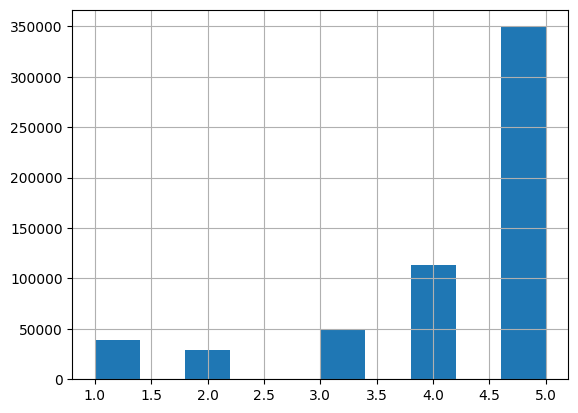

In [148]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [149]:
df_all_data_filtered_processed.isna().sum()

review                0
text                  0
review_year           0
helpfulness_0         0
helpfulness_1         0
authors           12397
publisher         97373
categories        47273
published_year        0
dtype: int64

In [150]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
224609,5.0,I bought this book to take on family hikes. Wh...,2002,0.000000,1.000000,[Peter Alden],Random House of Canada,[Nature],1999
571406,1.0,I saw this book in the hard back edition in a ...,2010,1.000000,1.000000,[Daniel Arasse],NaN,[Art],2014
556893,5.0,"I have over 10 years experience as a PC tech, ...",2000,0.000000,1.000000,NaN,NaN,[Computer technicians],1999
319774,5.0,This book is the only pictorial book I've enco...,1998,0.833333,0.833333,"[How Man Wong, Julie Gaw]",Odyssey Publications,[Photography],1998
8444,1.0,"Rick Jones is insane. Not in an entertaining, ...",2001,0.629630,0.629630,[Rick Jones],Chick Publications,"[Body, Mind & Spirit]",1988
569971,4.0,For any of you who do not have the following d...,2000,1.000000,1.000000,[Mary Clement],Macmillan,[Law],2000
71935,5.0,"Feeling twinges of regret at my own childhood,...",2003,1.000000,1.000000,[Caryl Hart],Bloomsbury Publishing,[Juvenile Fiction],2017
12035,5.0,The courageous Caner brothers have done us all...,2002,0.333333,0.333333,"[Ergun Mehmet Caner, Emir Fethi Caner]",Kregel Publications,[Religion],2002
557307,4.0,"The Invisible Man, by H.G. WellsI literally fi...",2010,0.500000,0.500000,[H G Wells],Rupa Publications India Pvt Limited,NaN,2000
10471,3.0,Can't complain about the price--it's free--but...,2012,1.000000,1.000000,[George Eliot],NaN,NaN,1966


In [151]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['review', 'text'])
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502046 entries, 0 to 502045
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          502046 non-null  float64
 1   text            502046 non-null  object 
 2   review_year     502046 non-null  int64  
 3   helpfulness_0   502046 non-null  float64
 4   helpfulness_1   502046 non-null  float64
 5   authors         490973 non-null  object 
 6   publisher       420055 non-null  object 
 7   categories      467215 non-null  object 
 8   published_year  502046 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 34.5+ MB


In [152]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
248113,2.0,I bought this book as an ODBC virgin. I had no...,1998,1.000000,1.000000,[Roger E. Sanders],Computing McGraw-Hill,[Computers],1999
127934,5.0,i found this work to be quite informative and ...,2012,1.000000,1.000000,[Konstantinos],Llewellyn Worldwide,"[Body, Mind & Spirit]",2005
4457,5.0,"First of all, in reference to the reviewer who...",2006,1.000000,1.000000,[Charles Dickens],Signet Classics,[Fiction],1980
234339,5.0,great book. I was excited to receive it as I a...,2012,0.000000,1.000000,[Terry Brooks],"Random House Digital, Inc.",[Fiction],2001
132954,5.0,Review by Tom rederiksen - http://members.aol....,1997,0.857143,0.857143,[Bernal Díaz del Castillo],Farrar Straus & Giroux,[History],1956
322954,4.0,I read this book and gave it 4 stars. Other re...,2006,1.000000,1.000000,[Robert Jordan],Macmillan,[Fiction],2005
404337,5.0,"This book made perfect sense to me, I would ho...",2008,0.428571,0.428571,[Eckhart Tolle],Penguin,[Self-Help],2006
295811,1.0,This book is absolutely rubbish! This is the f...,1998,0.333333,0.333333,[Winston Groom],Vintage,[Fiction],2012
89568,5.0,Ken Ham keeps amazing me with his ability to t...,2003,0.562500,0.562500,[Ken Ham],New Leaf Publishing Group,[Juvenile Nonfiction],2000
122296,3.0,It's amazing that Graham Greene always wrote a...,2010,0.000000,0.000000,[Graham Greene],NaN,NaN,2010


# Initial EDA and Final Preprocesing

## Helpfulness Column

### Removing Outliers

Porcentual helpfulness variable values should be between 0 and 1. Outliers are remove as they are just 2 entries from the entire dataset.

In [153]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    502046.000000
mean          0.504319
std           0.429890
min           0.000000
25%           0.000000
50%           0.545455
75%           1.000000
max           2.000000
Name: helpfulness_0, dtype: float64

In [154]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    502046.000000
mean          0.789840
std           0.317517
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           2.000000
Name: helpfulness_1, dtype: float64

In [155]:
df_all_data_filtered_processed.shape

(502046, 9)

In [156]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2].index)
df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2]['helpfulness_0'].value_counts()

Series([], Name: count, dtype: int64)

In [157]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)

In [158]:
df_all_data_filtered_processed.shape

(502044, 9)

In [159]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    502044.000000
mean          0.789835
std           0.317508
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           1.000000
Name: helpfulness_1, dtype: float64

In [160]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    502044.000000
mean          0.504313
std           0.429881
min           0.000000
25%           0.000000
50%           0.545455
75%           1.000000
max           1.000000
Name: helpfulness_0, dtype: float64

In [161]:
#Correlation Analysis 
df_all_data_filtered_processed[['helpfulness_0','helpfulness_1','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness_0,helpfulness_1,review
helpfulness_0,1.000000,0.298954,0.067885
helpfulness_1,0.298954,1.000000,0.302753
review,0.067885,0.302753,1.000000


Correlation matrix shows that helpfulness_0 and helpfulness_1 are not much correlated. But helpfulness_0 and helpfulness_1 provide the same information. Based on the correlation with 'review' column, helpfulness_1 is kept and helpfulness_0 is removed. In order to avoid repeated information.

In [162]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_0'], axis=1)

In [163]:
df_all_data_filtered_processed['helpfulness'] = df_all_data_filtered_processed['helpfulness_1']
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_1'], axis=1)
df_all_data_filtered_processed.sample(5)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
191921,1.0,For 486 pages I couldn't wait for the end to f...,1998,"[Tim F. LaHaye, Jerry B. Jenkins]","Tyndale House Publishers, Inc.",[FICTION],2011,0.600000
137053,5.0,I've read this book several times and it just ...,2011,[Louisa May Alcott],Lindhardt og Ringhof,[Fiction],2018,1.000000
374405,5.0,If you wake up in a cold sweat and worry that ...,2006,[Joyce Scardina Becker],St. Martin's Griffin,[Reference],2007,0.909091
239554,5.0,I could not believe how much information was p...,1999,[Sarah Wendell],"Sourcebooks, Inc.",[Family & Relationships],2011,1.000000
307765,2.0,"I received my copy of ""Working On Yourself...""...",2003,"[Ariel Kane, Shya Kane]",Ask Productions Incorporated,[Self-Help],1999,0.600000


## Authors Column

### Authors Names Standarization

During the Exploratory Data Analysis it was discovered that some authors are reviewed under diferent formats of their names. Based on this, the Dataset is simplified to contain only one name format.

In [164]:
#The examples are:
author_mapping = {
    'John Ronald Reuel Tolkien':'J. R. R. Tolkien',
    'J. R. R. Tolkien':'J. R. R. Tolkien',
    'J.R.R. Tolkien':'J. R. R. Tolkien',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith',
    'Gabriel Garcia Marquez':'Gabriel Garcia Marquez',
    'Gabriel García Márquez':'Gabriel Garcia Marquez',
    'Charlotte Brontë':'Charlotte Brontë',
    'Charlotte Bronte':'Charlotte Brontë',
    'Emily Brontë':'Emily Brontë',
    'Emily Bronte':'Emily Brontë',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith'
    }


In [165]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          502044 non-null  float64
 1   text            502044 non-null  object 
 2   review_year     502044 non-null  int64  
 3   authors         490971 non-null  object 
 4   publisher       420053 non-null  object 
 5   categories      467213 non-null  object 
 6   published_year  502044 non-null  int64  
 7   helpfulness     502044 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 30.6+ MB


In [166]:
def standardize_authors(authors):
    if isinstance(authors, list):
        return [author_mapping.get(author, author) for author in authors]
    else:
        return authors  # Return the original value if it's not a list

In [167]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(standardize_authors)

### Updating the Authors Feature to Categorical, and applying Pareto Principe to reduce the quantity of authors.

In [168]:
author_counts = df_all_data_filtered_processed['authors'].explode().value_counts()
author_counts

authors
J. R. R. Tolkien         6547
Jane Austen              2857
Charles Dickens          2581
John Steinbeck           2437
J. K. Rowling            2170
                         ... 
Campbell Soup Company       1
Van Dyke Henry              1
Ivan Conrad Karp            1
Joel Anderson               1
Frederic H. Martini         1
Name: count, Length: 89409, dtype: int64

In [169]:
sorted_author_counts = author_counts.sort_values(ascending=False)
sorted_author_counts

authors
J. R. R. Tolkien       6547
Jane Austen            2857
Charles Dickens        2581
John Steinbeck         2437
J. K. Rowling          2170
                       ... 
Rob Scrimger              1
Patrick J. Jung           1
Kenichi Sawai             1
James P. Johnston         1
Frederic H. Martini       1
Name: count, Length: 89409, dtype: int64

In [170]:
pareto_threshold = int(0.2 * len(sorted_author_counts))
pareto_threshold

17881

In [171]:
top_authors = sorted_author_counts.iloc[:pareto_threshold].index
top_authors

Index(['J. R. R. Tolkien', 'Jane Austen', 'Charles Dickens', 'John Steinbeck',
       'J. K. Rowling', 'Stephen King', 'Robert Jordan', 'Harper Lee',
       'C. S. Lewis', 'Ray Bradbury',
       ...
       'Mary Daly', 'Edward Dolnick', 'Simon Lewis', 'Greg Rossel',
       'Irving Shulman', 'Louis Begley', 'Allen P. Ross', 'Kerstin P. Ouellet',
       'Steven R. Lindsay', 'Brenda Brathwaite'],
      dtype='object', name='authors', length=17881)

In [172]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_authors else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

17882

After applying Pareto Principle, there are still 17923 unique authors on the dataset. If authors is considered as a Categorical Feature, it will not have much predictive because it has a lot of Cardinality.

Top 10 authors with most reviews are kept and the rest of authors are set to 'Other'. In order to keep the feature and analize the predicting power.

In [173]:
authors = df_all_data_filtered_processed['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 595351 entries, 0 to 502043
Series name: authors
Non-Null Count   Dtype 
--------------   ----- 
595351 non-null  object
dtypes: object(1)
memory usage: 9.1+ MB


In [174]:
print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 17882


In [175]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 595351


In [176]:
top_10_authors_counts = author_counts[:10].sort_values(ascending=False)
top_10_authors_counts

authors
Other               137978
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

In [177]:
other_authors_counts = author_counts[10:]
other_authors_counts

authors
Ray Bradbury              1684
Kurt Vonnegut             1652
George Orwell             1649
Agatha Christie           1562
Lois Lowry                1540
                          ... 
Bob Fitrakis                 5
Robert J. Fitrakis           5
Herbert Charles Corben       5
Philip Stehle                5
Mary Herczog                 5
Name: count, Length: 17872, dtype: int64

In [178]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_10_authors_counts else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

10

In [179]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other               571241
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

In [180]:
def remove_repeated_values(in_list):
    unique_list = []
    for item in in_list:
        if item not in unique_list:
            unique_list.append(item)

    return unique_list

In [181]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
293059,5.0,Reading &quot;Aint't No River&quot; was a beau...,2001,[Other],NaN,[Fiction],2003,1.000000
482591,1.0,THIS TOTALLY SUCK ! DON'T BUY THIS!! HE IS STE...,2003,[Other],Nicholas Direct Incorporated,[Business & Economics],1998,0.235294
216543,5.0,The combination of pure insight and Ms. Kushel...,1999,"[Other, Other]",The Princeton Review,[Business & Economics],1999,0.833333
405672,3.0,This is a decent book touching on Gerrymanderi...,2002,[Other],University of Chicago Press,[Political Science],2001,0.312500
164802,5.0,The highly pined for MBA degree is something t...,2005,"[Other, Other]","Random House Digital, Inc.",[Business & Economics],2004,0.600000


In [182]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: remove_repeated_values(x))

In [183]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
293059,5.0,Reading &quot;Aint't No River&quot; was a beau...,2001,[Other],NaN,[Fiction],2003,1.000000
482591,1.0,THIS TOTALLY SUCK ! DON'T BUY THIS!! HE IS STE...,2003,[Other],Nicholas Direct Incorporated,[Business & Economics],1998,0.235294
216543,5.0,The combination of pure insight and Ms. Kushel...,1999,[Other],The Princeton Review,[Business & Economics],1999,0.833333
405672,3.0,This is a decent book touching on Gerrymanderi...,2002,[Other],University of Chicago Press,[Political Science],2001,0.312500
164802,5.0,The highly pined for MBA degree is something t...,2005,[Other],"Random House Digital, Inc.",[Business & Economics],2004,0.600000


In [184]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other               478802
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

## Cateogories Column

### Updating the Categories Feature to Categorical, and applying Pareto Principe to reduce the quantity of Categories.

In [185]:
categories_counts = df_all_data_filtered_processed['categories'].explode().value_counts()
categories_counts

categories
Fiction                         148514
Juvenile Fiction                 38390
Biography & Autobiography        21608
Religion                         19505
History                          18091
                                 ...  
Sales personnel                      1
Musical intervals and scales         1
FOREIGN LANGUAGE STUDY               1
Nuclear submarines                   1
Galveston (Tex.)                     1
Name: count, Length: 6675, dtype: int64

In [186]:
sorted_category_counts = categories_counts.sort_values(ascending=False)
sorted_category_counts

categories
Fiction                        148514
Juvenile Fiction                38390
Biography & Autobiography       21608
Religion                        19505
History                         18091
                                ...  
Congo (Democratic Republic)         1
Alien labor                         1
Nuns                                1
Communalism                         1
Galveston (Tex.)                    1
Name: count, Length: 6675, dtype: int64

In [187]:
pareto_threshold = int(0.2 * len(sorted_category_counts))
pareto_threshold

1335

In [188]:
top_categories = sorted_category_counts.iloc[:pareto_threshold].index
top_categories

Index(['Fiction', 'Juvenile Fiction', 'Biography & Autobiography', 'Religion',
       'History', 'Business & Economics', 'Computers', 'Cooking',
       'Social Science', 'Family & Relationships',
       ...
       'Homeric', 'Christian poetry', 'Autobiography',
       'Star Wars: The Roleplaying Game (Game)', 'Strategic planning',
       'African American authors', 'Hindu mathematics', 'Motorcycles',
       'Compulsive behavior', 'Metaphysics'],
      dtype='object', name='categories', length=1335)

In [189]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_categories else 'Other' for category in x] if isinstance(x, list) else ['Other'])
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Fiction                      148514
Other                         46618
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
                              ...  
Sicilian Vespers                  8
Mental illness                    8
Anthropologists                   8
Great Plague                      8
Attitude (Psychology)             8
Name: count, Length: 1336, dtype: int64

After applying Pareto Principle, there are still 1342 unique categories on the dataset. If categories is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 categories with most reviews are kept and the rest of categories are set to 'Other'. In order to keep the feature and analize the predicting power.

In [190]:
categories = df_all_data_filtered_processed['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 514251 entries, 0 to 502043
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
514251 non-null  object
dtypes: object(1)
memory usage: 7.8+ MB


In [191]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 1336


In [192]:
categories_counts = categories.value_counts(ascending=False)
print(f'Total of entries after explode Categories column {categories_counts.sum()}')

Total of entries after explode Categories column 514251


In [193]:
top_10_categories_counts = categories_counts[:10].sort_values(ascending=False)
top_10_categories_counts

categories
Fiction                      148514
Other                         46618
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

In [194]:
other_categories_counts = categories_counts[10:]
other_categories_counts

categories
Family & Relationships    6126
Self-Help                 6021
Body                      5978
Mind & Spirit             5975
Juvenile Nonfiction       5922
                          ... 
Sicilian Vespers             8
Mental illness               8
Anthropologists              8
Great Plague                 8
Attitude (Psychology)        8
Name: count, Length: 1326, dtype: int64

In [195]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_10_categories_counts else 'Other' for category in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['categories'].explode().unique())

10

In [196]:
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Other                        232161
Fiction                      148514
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

In [197]:
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
131904,5.0,Some background first: I'm studying memoir as ...,2011,[Other],Picador,[Other],2015,0.000000
326762,1.0,This is a horribly printed book. The actual st...,2009,[Other],Random House Trade Paperbacks,[Fiction],1996,0.906977
343900,1.0,After reading Riptide a while back I thought I...,2004,[Other],Penguin,[Fiction],2005,1.000000
336391,5.0,This is a great marketing book. No hype and no...,2003,[Other],Routledge,[Business & Economics],2002,1.000000
314424,3.0,I have used this book in my reading classes fo...,2000,[Other],NaN,[Other],2006,0.875000


In [198]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: remove_repeated_values(x))
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
131904,5.0,Some background first: I'm studying memoir as ...,2011,[Other],Picador,[Other],2015,0.000000
326762,1.0,This is a horribly printed book. The actual st...,2009,[Other],Random House Trade Paperbacks,[Fiction],1996,0.906977
343900,1.0,After reading Riptide a while back I thought I...,2004,[Other],Penguin,[Fiction],2005,1.000000
336391,5.0,This is a great marketing book. No hype and no...,2003,[Other],Routledge,[Business & Economics],2002,1.000000
314424,3.0,I have used this book in my reading classes fo...,2000,[Other],NaN,[Other],2006,0.875000


In [199]:
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Other                        220055
Fiction                      148514
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

## Publisher Column

In [200]:
publisher_counts = df_all_data_filtered_processed['publisher'].value_counts()
publisher_counts

publisher
Penguin                         25291
Simon and Schuster              23284
Harper Collins                  15718
Vintage                          8116
Random House                     7971
                                ...  
Squaredance Fundamentals            1
Pearson Custom Pub                  1
Blooming Twig Books                 1
Oxford : Phaidon, Christie's        1
Src Pub.                            1
Name: count, Length: 10945, dtype: int64

### Updating the publisher Feature to Categorical, and applying Pareto Principe to reduce the quantity of publishers.

In [201]:
sorted_publisher_counts = publisher_counts.sort_values(ascending=False)
sorted_publisher_counts

publisher
Penguin                               25291
Simon and Schuster                    23284
Harper Collins                        15718
Vintage                                8116
Random House                           7971
                                      ...  
Sawday                                    1
Beech Tree Books                          1
Rainbow Morning Music Alternatives        1
Strident Publishing                       1
Src Pub.                                  1
Name: count, Length: 10945, dtype: int64

In [202]:
pareto_threshold = int(0.2 * len(sorted_publisher_counts))
pareto_threshold

2189

In [203]:
top_publishers = sorted_publisher_counts.iloc[:pareto_threshold].index
top_publishers

Index(['Penguin', 'Simon and Schuster', 'Harper Collins', 'Vintage',
       'Random House', 'Macmillan', 'Houghton Mifflin Harcourt', 'Bantam',
       'HarperCollins', 'John Wiley & Sons',
       ...
       'World Scientific Publishing Company', 'Prestel Pub',
       'McSweeneys Books', 'Financial Times/Prentice Hall', 'M J F Books',
       'Laurence King Publishing', 'Marshall Cavendish',
       'Sky Publishing Corporation', 'MDPI', 'I.B. Tauris'],
      dtype='object', name='publisher', length=2189)

In [204]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_publishers else 'Other')
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                               110339
Penguin                              25291
Simon and Schuster                   23284
Harper Collins                       15718
Vintage                               8116
                                     ...  
Laurence Holt Books Incorporated        14
Phoenix Publishing (WA)                 14
Lothian Children's Books                14
Haynes Publishing UK                    14
Berklee PressPublications               14
Name: count, Length: 2190, dtype: int64

After applying Pareto Principle, there are still 2194 unique publishers on the dataset. If publishers is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 publishers with most reviews are kept and the rest of publishers are set to 'Other'. In order to keep the feature and analize the predicting power.

In [205]:
publishers = df_all_data_filtered_processed['publisher']
publishers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 502044 entries, 0 to 502043
Series name: publisher
Non-Null Count   Dtype 
--------------   ----- 
502044 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [206]:
print(f'Total of Publishers: {len(publishers.unique())}')

Total of Publishers: 2190


In [207]:
publisher_counts = publishers.value_counts(ascending=False)
publisher_counts

publisher
Other                               110339
Penguin                              25291
Simon and Schuster                   23284
Harper Collins                       15718
Vintage                               8116
                                     ...  
Laurence Holt Books Incorporated        14
Phoenix Publishing (WA)                 14
Lothian Children's Books                14
Haynes Publishing UK                    14
Berklee PressPublications               14
Name: count, Length: 2190, dtype: int64

In [208]:
top_10_publishers_counts = publisher_counts[:10].sort_values(ascending=False)
top_10_publishers_counts

publisher
Other                        110339
Penguin                       25291
Simon and Schuster            23284
Harper Collins                15718
Vintage                        8116
Random House                   7971
Macmillan                      5971
Houghton Mifflin Harcourt      5096
Bantam                         4831
HarperCollins                  4789
Name: count, dtype: int64

In [209]:
other_publishers_counts = publisher_counts[10:]
other_publishers_counts

publisher
John Wiley & Sons                   4775
Courier Corporation                 4392
Hachette UK                         4286
Penguin UK                          4092
Ballantine Books                    3522
                                    ... 
Laurence Holt Books Incorporated      14
Phoenix Publishing (WA)               14
Lothian Children's Books              14
Haynes Publishing UK                  14
Berklee PressPublications             14
Name: count, Length: 2180, dtype: int64

In [210]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_10_publishers_counts else 'Other')
len(df_all_data_filtered_processed['publisher'].unique())

10

In [211]:
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                        400977
Penguin                       25291
Simon and Schuster            23284
Harper Collins                15718
Vintage                        8116
Random House                   7971
Macmillan                      5971
Houghton Mifflin Harcourt      5096
Bantam                         4831
HarperCollins                  4789
Name: count, dtype: int64

In [212]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
457656,5.0,"For hard to find words, this is the best I've ...",1997,[Other],Other,[Other],1982,1.000000
109079,5.0,From my childhood - this is a classic : one of...,2013,[Other],Other,[Other],1862,1.000000
66237,5.0,Dr. Peter Marshall's story about his rough chi...,2006,[Other],Other,[Biography & Autobiography],2002,1.000000
283030,5.0,This is such a great book!! You can really fee...,2007,[Other],Other,[Fiction],2006,1.000000
220161,5.0,"A nuanced narrative with gorgeous description,...",2008,[Other],Other,[Fiction],2012,1.000000
231014,4.0,I read this book while traveling and hiking so...,2009,[Other],Other,[Biography & Autobiography],1988,0.000000
429489,5.0,Outstanding. A nice spin on a long-term serial...,2001,[Other],Harper Collins,[Fiction],2009,1.000000
422888,4.0,"Hrabal's short novella ""Closely Observed Train...",2004,[Other],Other,[Other],1968,0.842105
349927,4.0,"Homecoming is a story about four kids, Dicey, ...",2006,[Other],Other,[Other],2002,1.000000
7971,1.0,Congratulations to Priya Gandhi-Ganesh for wri...,2005,[Other],Other,[History],2004,0.770833


## Published Year Column

In [213]:
df_all_data_filtered_processed['published_year'].describe().T

count    502044.000000
mean       2000.607662
std          25.941981
min         101.000000
25%        1999.000000
50%        2005.000000
75%        2012.000000
max        2030.000000
Name: published_year, dtype: float64

In [214]:
datetime.today().year

2023

In [215]:
df_all_data_filtered_processed[df_all_data_filtered_processed['published_year'] > datetime.today().year]

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
61300,2.0,I guess my expectations of this book would be ...,2002,[Other],Other,[Other],2024,0.500000
201009,5.0,Thanks to Dr. Cosby and Renee Pouissant we now...,2004,[Other],Simon and Schuster,[Biography & Autobiography],2030,0.941176
398835,5.0,"Scott Malensek's third offering, while a depar...",2002,[Other],Other,[Other],2024,0.600000


Found values where the published year is grather than the current year are removed as they are just 3 values. Do not affects the dataset of + 500 000 entries

In [216]:
df_all_data_filtered_processed.shape

(502044, 8)

In [217]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(df_all_data_filtered_processed[df_all_data_filtered_processed['published_year'] > datetime.today().year].index)
df_all_data_filtered_processed.shape

(502041, 8)

<Axes: >

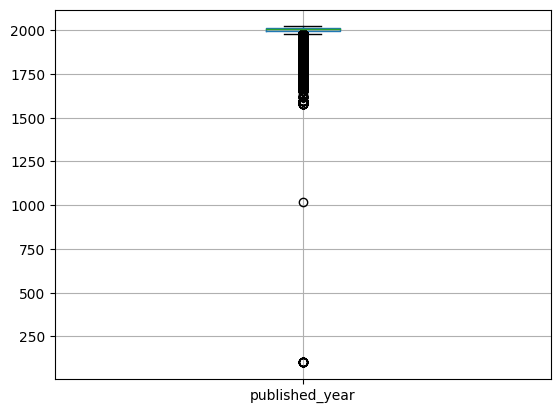

In [218]:
df_all_data_filtered_processed.boxplot(column='published_year')

# Processed Datasets Saving

In [219]:
df_all_data_filtered_processed = df_all_data_filtered_processed.reset_index()
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502041 entries, 0 to 502040
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           502041 non-null  int64  
 1   review          502041 non-null  float64
 2   text            502041 non-null  object 
 3   review_year     502041 non-null  int64  
 4   authors         502041 non-null  object 
 5   publisher       502041 non-null  object 
 6   categories      502041 non-null  object 
 7   published_year  502041 non-null  int64  
 8   helpfulness     502041 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 34.5+ MB


In [220]:
#A reduced Dataset is created to process Text Column and Apply sentiment Analysis.
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
492101,492101,"Wow! Amazing us all once again, Mr.Westerfield..."
127347,127347,I highly recommend to any history or civil war...
305629,305629,as a long time mystery reader I find Mr. Jacob...
342235,342235,Karen has outlined in her book her physical fi...
469421,469421,"""Beyond a certain age, sincerity ceases to fee..."
202872,202872,This book is one of the best works of literatu...
263064,263064,I am working on a school guidance master's deg...
26505,26505,At first the book goes back and forth and it c...
354549,354549,We love interactive books that make the readin...
416426,416426,I've reached the final chapter of this book an...


In [221]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [222]:
df_reduced.to_csv('../data/processed/df_reduced.csv')